In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

df_DA_US_explode = df_DA_US.explode('job_skills')

df_da_us_pivot = df_DA_US_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

df_da_us_pivot.loc['Total'] = df_da_us_pivot.sum()

sorted_columns = df_da_us_pivot.loc['Total'].sort_values(ascending=False).index
df_da_us_pivot = df_da_us_pivot[sorted_columns]

df_da_us_pivot


job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


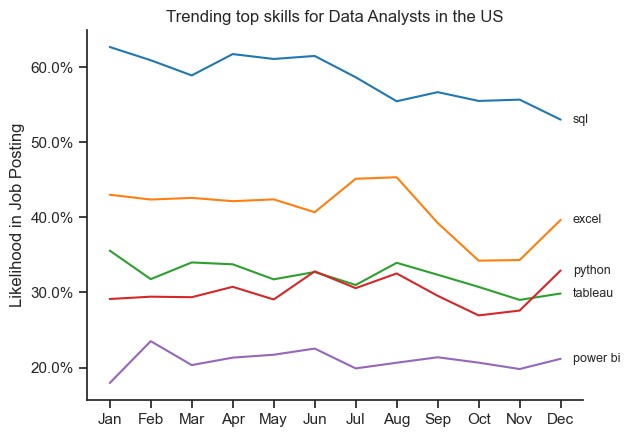

In [14]:

DA_Total = df_DA_US.groupby('job_posted_month_no').size()


df_da_us_perc = df_da_us_pivot.div(DA_Total / 100, axis=0).reset_index()


df_da_us_perc = df_da_us_perc[pd.to_numeric(df_da_us_perc['job_posted_month_no'], errors='coerce').notna()]
df_da_us_perc['job_posted_month_no'] = df_da_us_perc['job_posted_month_no'].astype(int)


df_da_us_perc['job_posted_month'] = df_da_us_perc['job_posted_month_no'].apply(
    lambda x: pd.to_datetime(x, format='%m').strftime('%b')
)


df_da_us_perc = df_da_us_perc.set_index('job_posted_month').drop(columns='job_posted_month_no')

df_plot= df_da_us_perc.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending top skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))


for i in range(5):
    plt.text(
        x=len(df_plot) - 1 + 0.3,                      # X position slightly to the right
        y=df_plot.iloc[-1, i],                         # Last Y value of each line
        s=df_plot.columns[i],                          # Label = column name
        fontsize=9,
        va='center'
    )
